<a href="https://colab.research.google.com/github/sakshisehrawat/Advanced-ML-projects-/blob/main/pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CNN image classification

170498071/170498071 [==============================] - 3s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                       

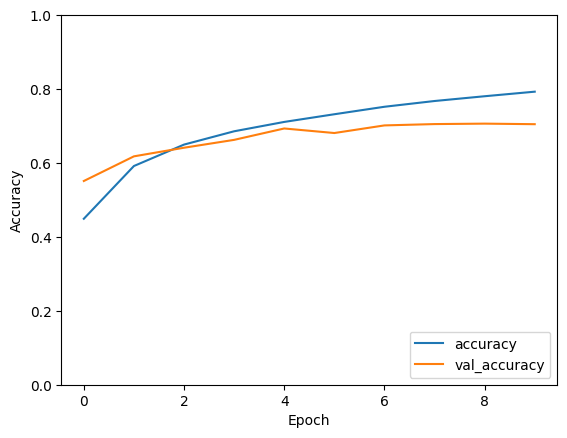

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset from tensorflow
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy:", test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


LSTM

In [ ]:
# Importing necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generating some dummy data
data = np.random.randn(1000, 10)  # 1000 timesteps, 10 features

# Creating input and output sequences for the LSTM
sequence_length = 10
X = []
y = []
for i in range(len(data) - sequence_length):
    X.append(data[i:i+sequence_length])
    y.append(data[i+sequence_length])

X = np.array(X)
y = np.array(y)

# Splitting data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Reshaping data for LSTM input (samples, timesteps, features)
X_train = X_train.reshape(-1, sequence_length, 10)
X_test = X_test.reshape(-1, sequence_length, 10)

# Defining the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 10)))  # 50 LSTM units
model.add(Dense(10))  # Output layer with 10 units (output features)
model.compile(optimizer='adam', loss='mse')  # Compiling the model

# Training the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluating the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/10
25/25 [==============================] - 4s 23ms/step - loss: 0.9840 - val_loss: 0.9870
Epoch 2/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9688 - val_loss: 0.9847
Epoch 3/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9613 - val_loss: 0.9846
Epoch 4/10
25/25 [==============================] - 0s 6ms/step - loss: 0.9557 - val_loss: 0.9843
Epoch 5/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9516 - val_loss: 0.9850
Epoch 6/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9472 - val_loss: 0.9855
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9440 - val_loss: 0.9883
Epoch 8/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9394 - val_loss: 0.9893
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.9355 - val_loss: 0.9913
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.9929
Test Loss: 0.9928568005561829


Movie Review

In [ ]:
# Importing necessary libraries
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
from keras.preprocessing import sequence

# Setting parameters
max_features = 5000  # Number of words to consider as features
maxlen = 100  # Maximum sequence length
batch_size = 32
embedding_dims = 50
epochs = 5

# Loading the IMDB dataset
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Padding sequences to a fixed length
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# Building the LSTM model
print('Building model...')
model = Sequential()
model.add(Embedding(max_features, embedding_dims, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Training the model
print('Training model...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

# Evaluating the model
print('Evaluating model...')
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Loading data...
17464789/17464789 [==============================] - 0s 0us/step
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Building model...
Training model...
Epoch 1/5
782/782 [==============================] - 32s 38ms/step - loss: 0.4421 - accuracy: 0.7873 - val_loss: 0.3578 - val_accuracy: 0.8412
Epoch 2/5
782/782 [==============================] - 11s 14ms/step - loss: 0.2967 - accuracy: 0.8754 - val_loss: 0.3514 - val_accuracy: 0.8478
Epoch 3/5
782/782 [==============================] - 11s 14ms/step - loss: 0.2406 - accuracy: 0.9009 - val_loss: 0.3527 - val_accuracy: 0.8470
Epoch 4/5
782/782 [==============================] - 10s 13ms/step - loss: 0.1942 - accuracy: 0.9247 - val_loss: 0.3969 - val_accuracy: 0.8373
Epoch 5/5
782/782 [==============================] - 8s 11ms/step - loss: 0.1631 - accuracy: 0.9368 - val_loss: 0.4218 - val_accuracy: 0.8391
Evaluating model...
782/782 [==============================] - 3s 4ms/step - loss: 

Energy Consumption using LSTM

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
data = pd.read_csv(url)

# Select features and target variable
features = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'RH_out', 'Press_mm_hg', 'Windspeed', 'Visibility', 'Tdewpoint']
target = ['Appliances']

# Normalize the features
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

# Splitting data into train and test sets
X = data[features].values
y = data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshaping data for LSTM input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Building the LSTM model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluating the model
mse = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Set:", mse)


Epoch 1/10
494/494 [==============================] - 5s 4ms/step - loss: 15756.6650
Epoch 2/10
494/494 [==============================] - 2s 4ms/step - loss: 11781.5771
Epoch 3/10
494/494 [==============================] - 3s 7ms/step - loss: 10852.0059
Epoch 4/10
494/494 [==============================] - 3s 7ms/step - loss: 10664.0742
Epoch 5/10
494/494 [==============================] - 3s 7ms/step - loss: 10637.7676
Epoch 6/10
494/494 [==============================] - 3s 7ms/step - loss: 10635.1807
Epoch 7/10
494/494 [==============================] - 4s 8ms/step - loss: 10633.4570
Epoch 8/10
494/494 [==============================] - 3s 6ms/step - loss: 10616.4180
Epoch 9/10
494/494 [==============================] - 3s 6ms/step - loss: 10510.6084
Epoch 10/10
494/494 [==============================] - 3s 5ms/step - loss: 10370.6660
Mean Squared Error on Test Set: 9660.830078125


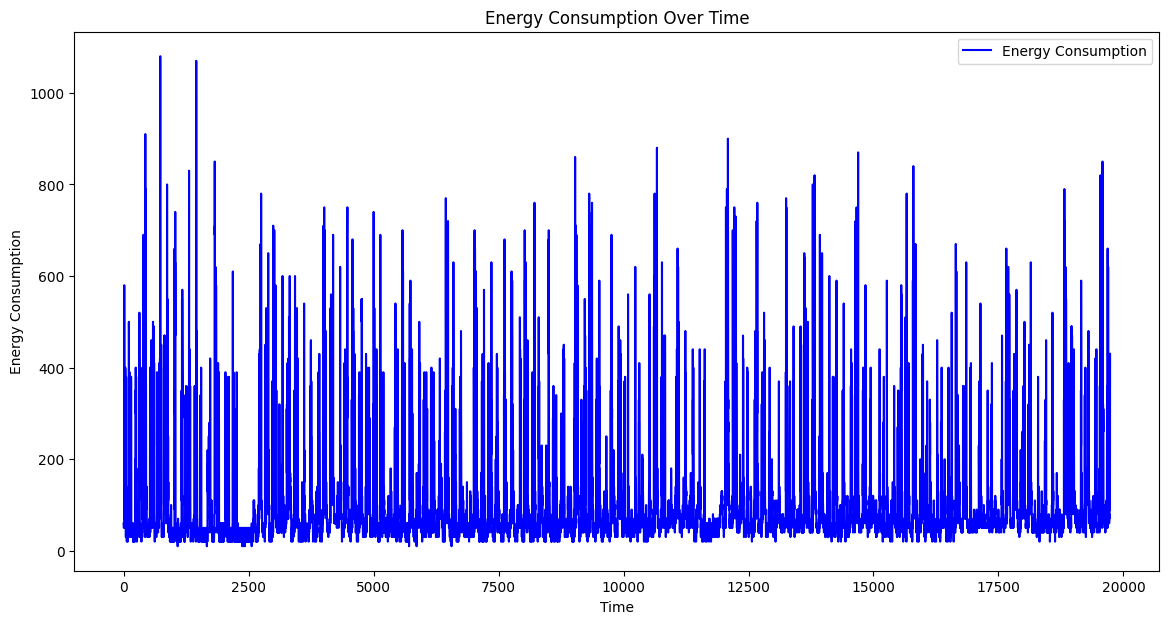

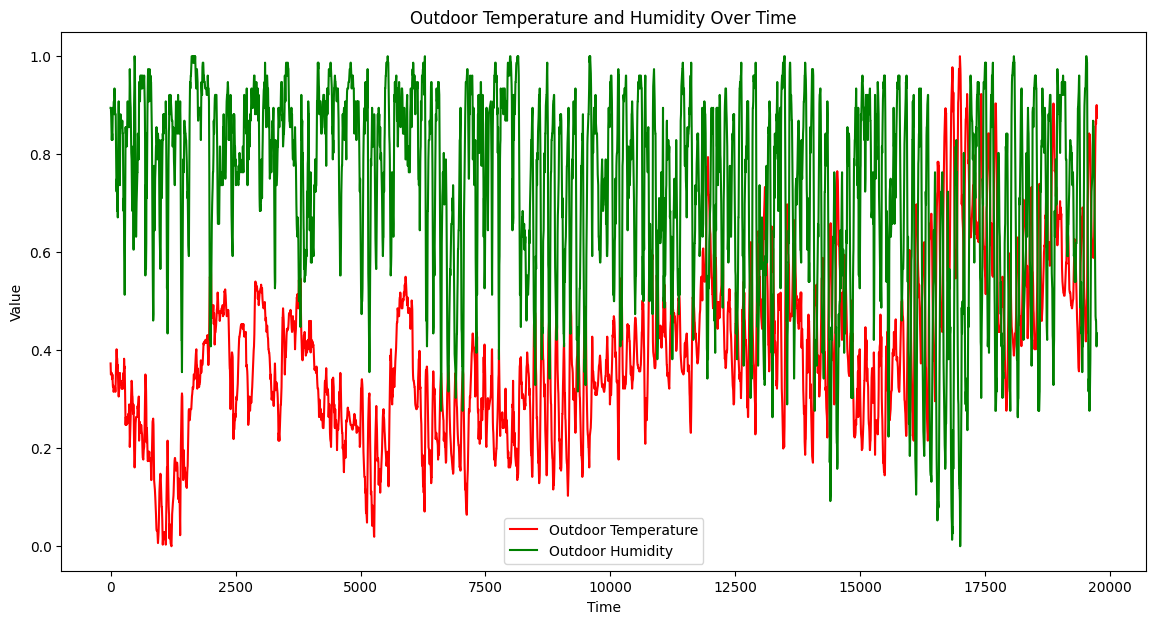

In [ ]:
import matplotlib.pyplot as plt

# Plotting energy consumption
plt.figure(figsize=(14, 7))
plt.plot(data['Appliances'], label='Energy Consumption', color='blue')
plt.title('Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()

# Plotting temperature and humidity
plt.figure(figsize=(14, 7))
plt.plot(data['T_out'], label='Outdoor Temperature', color='red')
plt.plot(data['RH_out'], label='Outdoor Humidity', color='green')
plt.title('Outdoor Temperature and Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


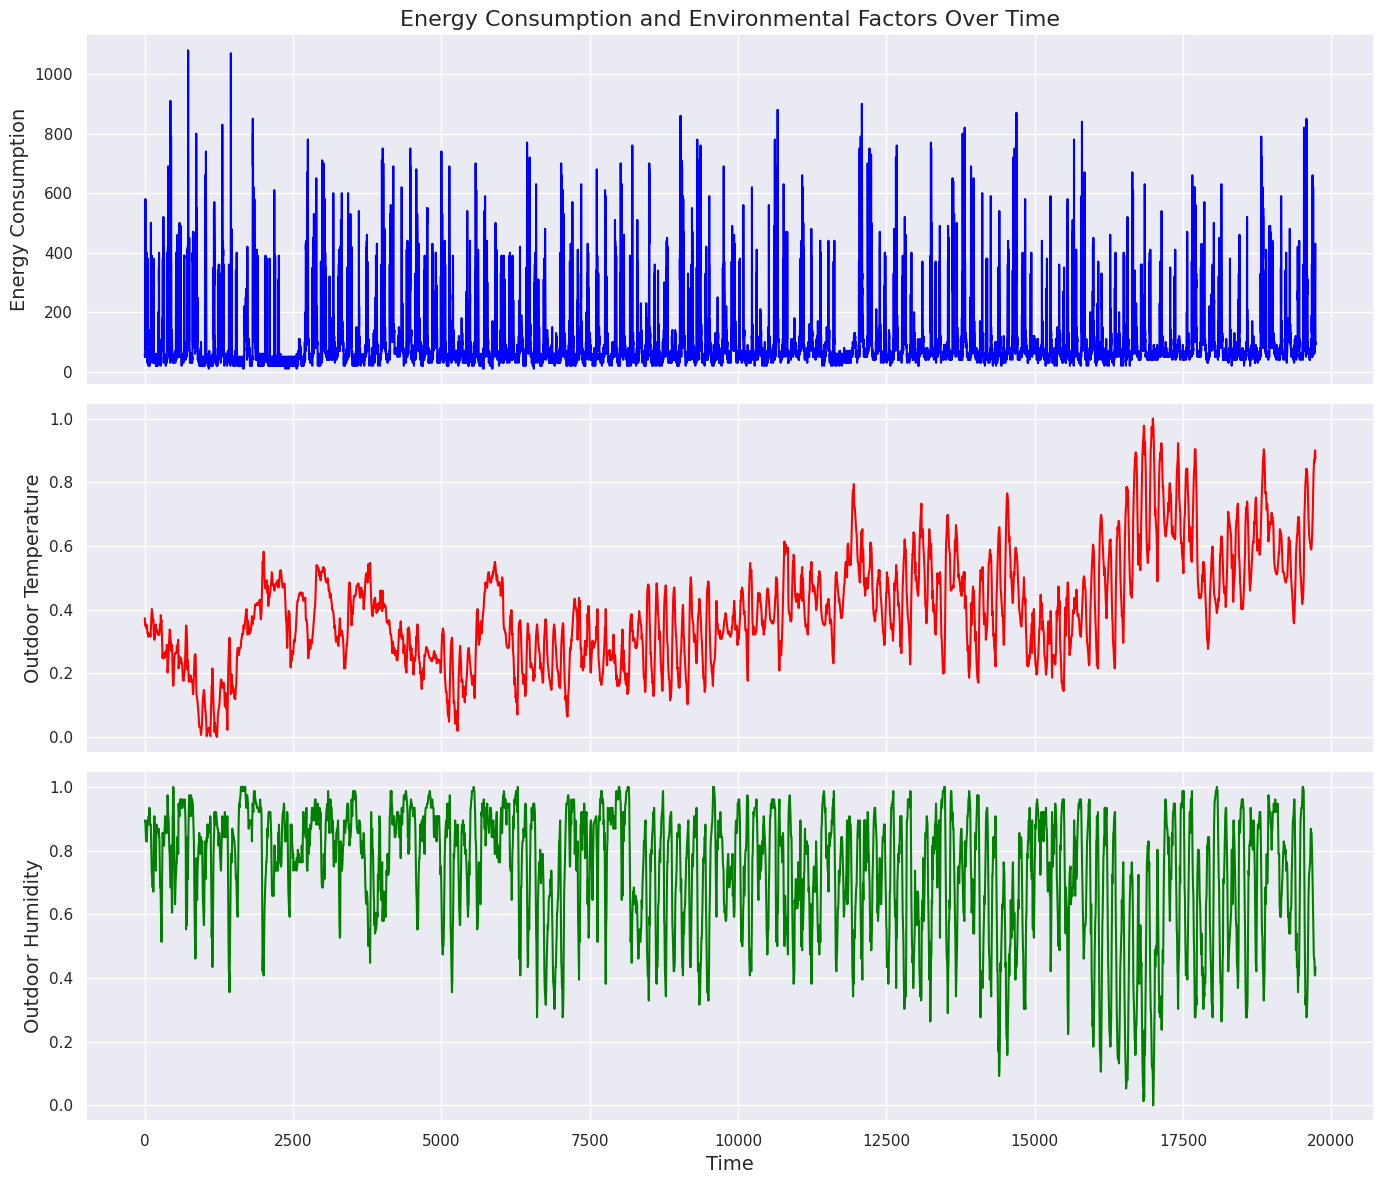

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="darkgrid")

# Create a figure and subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot energy consumption
axes[0].plot(data.index, data['Appliances'], color='blue')
axes[0].set_ylabel('Energy Consumption', fontsize=14)
axes[0].set_title('Energy Consumption and Environmental Factors Over Time', fontsize=16)

# Plot temperature
axes[1].plot(data.index, data['T_out'], color='red')
axes[1].set_ylabel('Outdoor Temperature', fontsize=14)

# Plot humidity
axes[2].plot(data.index, data['RH_out'], color='green')
axes[2].set_ylabel('Outdoor Humidity', fontsize=14)

# Set common x-axis label
axes[-1].set_xlabel('Time', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()



Generative AI

In [ ]:
import requests
from bs4 import BeautifulSoup
import random

# Function to fetch text data from Gutenberg
def fetch_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    text = soup.get_text()
    return text

# Function to generate text
def generate_text(dataset_url, num_paragraphs=1):
    text = fetch_text(dataset_url)
    paragraphs = text.split('\n\n')
    selected_paragraphs = random.sample(paragraphs, min(num_paragraphs, len(paragraphs)))
    generated_text = '\n\n'.join(selected_paragraphs)
    return generated_text

# Example usage
gutenberg_url = "http://www.gutenberg.org/cache/epub/11/pg11.txt"  # URL of a specific book in Gutenberg
generated_text = generate_text(gutenberg_url, num_paragraphs=1)
print(generated_text)



In [ ]:
import requests
import random

# Function to fetch text data from a URL
def fetch_text(url):
    response = requests.get(url)
    return response.text

# Function to generate text with a specified maximum number of words
def generate_text(dataset_url, max_words=50):
    text = fetch_text(dataset_url)
    words = text.split()
    selected_words = random.sample(words, min(max_words, len(words)))
    generated_text = ' '.join(selected_words)
    return generated_text
import requests

# Example usage
gutenberg_url = "http://www.gutenberg.org/cache/epub/11/pg11.txt"  # URL of a specific book in Gutenberg
generated_text = generate_text(gutenberg_url, max_words=100)
print(generated_text)


“Oh, Just “Project place any soon Alice; can busy and said to confused work like must first; all “not the a and labelled you, could in him! It’s you little all beg fact “And a the brought I works the or a easily Duchess. “It’s is ashamed best * a Alice finds “Why,” nose, “Where’s imposed we games I’ll to again: and old Pigeon the guinea-pig, father; accordance has written with large O a bright with at day; in carried trying sing herself out words I CHAPTER reply ran _would_ put his as the it!” and and race had herself


﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland This ebook is for the use of anyone anywhere in the
United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may
copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this ebook
or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws
of the country where you are located before using this eBook. Title: Alice's Adventures in Wonderland Author: Lewis Carroll Release
date: June 27, 2008 [eBook #11] Most recently updated: February 4, 2024 Language: English Credits: Arthur DiBianca and David Widger
*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND *** [Illustration] Alice’s Adventures in Wonderland by Lewis Carroll
THE MILLENNIUM FULCRUM EDITION 3.0 Contents CHAPTER I. Down the Rabbit-Hole CHAPTER II. The Pool of Tears CHAPTER III. A
Caucus-Race and a Long Tal

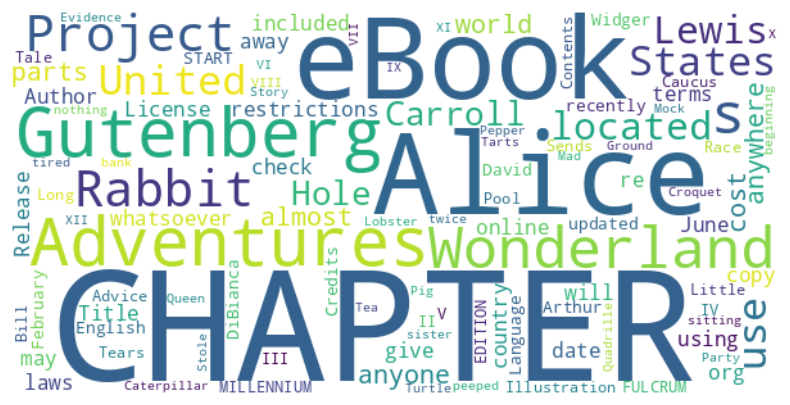

In [ ]:
import requests

# Function to fetch text data from a URL
def fetch_text(url):
    response = requests.get(url)
    return response.text

# Function to generate text with a specified total number of words and maximum number of words per line
def generate_text(dataset_url, total_words=100, max_words_per_line=20):
    text = fetch_text(dataset_url)
    words = text.split()
    lines = []
    current_line = []
    word_count = 0
    for word in words:
        current_line.append(word)
        word_count += 1
        if len(current_line) >= max_words_per_line or word_count >= total_words:
            lines.append(' '.join(current_line))
            current_line = []
        if word_count >= total_words:
            break
    if current_line:
        lines.append(' '.join(current_line))
    generated_text = '\n'.join(lines)
    return generated_text

# Example usage
gutenberg_url = "http://www.gutenberg.org/cache/epub/11/pg11.txt"
generated_text = generate_text(gutenberg_url, total_words=250, max_words_per_line=20)
print(generated_text)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud
def generate_wordcloud(text):
    wordcloud = WordCloud(width=600, height=300, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Example usage
generate_wordcloud(generated_text)

